In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Численное решение дифференциальных уравнений

### Метод Эйлера (частный случай формулы Рунге-Кутта)
$$ y'=f(x,y) $$ 
$$ y_{i+1}=y_i+h \cdot f(x_i,y_i) $$ 
$$ h=\frac{b-a}{n} $$ 

In [3]:
def euler(a, b, func, n, y_init):
    args = np.linspace(a, b, n)
    vals = [0] * n
    vals[0] = y_init
    h = abs(b - a) / n
    for i in range(n - 1):
        vals[i + 1] = vals[i] + func(args[i], vals[i]) * h
    
    return args, vals

### Метод Рунге-Кутта
$$ y'=f(x,y) $$ 
$$ y_{i+1}=y_i+\frac{h}{6} (k_1+2k_2+2k_3+k_4) $$ 
$$ k_1=f(x_i,y_i) \cdot h $$ 
$$ k_2=f(x_i+\frac{h}{2},y_i+\frac{k_1}{2}) \cdot h $$ 
$$ k_3=f(x_i+\frac{h}{2},y_i+\frac{k_2}{2}) \cdot h $$ 
$$ k_4=f(x_i+h,y_i+k_3) \cdot h $$ 
$$ h=\frac{b-a}{n} $$ 
В методе Рунге-Кутта мы воспользуемся
$$ y_{i+1}=y_i+f(x_i+\frac{h}{2},y_i+\frac{k_1}{2}) \cdot h $$ 

In [4]:
def runge(a, b, func, n, y_init):
    args = np.linspace(a, b, n)
    vals = [0] * n
    vals[0] = y_init
    h = abs(b - a) / n
    for i in range(n - 1):
        k = func(args[i], vals[i]) * h
        vals[i + 1] = vals[i] + func(args[i] + h / 2, vals[i] + k / 2) * h
    
    return args, vals

#### Решить уравнение:
$$ y'=y+x $$ 
$$ y(0)=0 $$ 
$$ x \in [0,2] $$ 

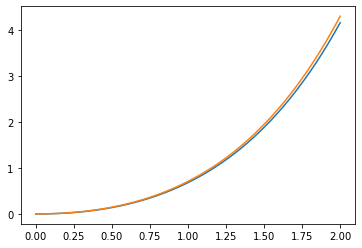

In [5]:
def func_1(x, y):
    return y + x


args_1, vals_1 = euler(0, 2, func_1, 100, 0)
args_2, vals_2 = runge(0, 2, func_1, 100, 0)

plt.plot(args_1, vals_1)
plt.plot(args_2, vals_2)
plt.show()

#### Решить уравнение:
$$ y'=y-\frac{2x}{y} $$ 
$$ y(0)=1 $$ 
$$ x \in [0,40] $$ 

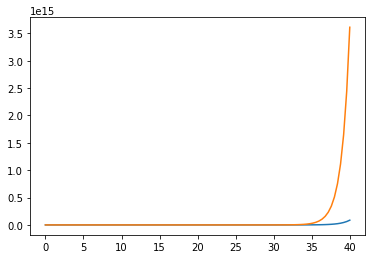

In [6]:
def func_2(x, y):
    return y - 2 * x / y


args_1, vals_1 = euler(0, 40, func_2, 100, 1)
args_2, vals_2 = runge(0, 40, func_2, 100, 1)

plt.plot(args_1, vals_1)
plt.plot(args_2, vals_2)
plt.show()

#### Решить уравнение:
$$ y'=x^2-2y $$ 
$$ y(0)=1 $$ 
$$ x \in [0,10] $$ 

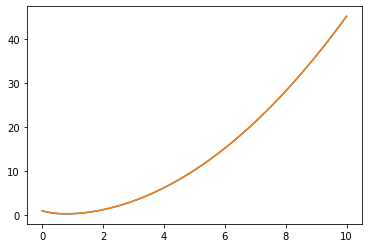

In [7]:
def func_3(x, y):
    return x ** 2 - 2 * y


args_1, vals_1 = euler(0, 10, func_3, 100, 1)
args_2, vals_2 = runge(0, 10, func_3, 100, 1)

plt.plot(args_1, vals_1)
plt.plot(args_2, vals_2)
plt.show()

### Метод Рунге-Кутта второго порядка
$$ y'=f(x,y) $$ 
$$ y(x_{0})=y_{0} $$ 
$$ y_{i+1}=y_{i}+C_{1} \cdot k_{1_{i}} + C_{2} \cdot k_{2_{i}} $$ 
$$ k_{1_{i}}=f(x_{i-1},y_{i-1}) \cdot h $$ 
$$ k_{2_{i}}=f(x_{i-1}+ \alpha_{2} \cdot h,y_{i-1}+ \beta_{21} \cdot k_{1_{i}}) \cdot h $$ 
$$ C_{1}+C_{2}=1 \Rightarrow C_{1}=1-C_{2} $$ 
$$ \alpha_{2}=\beta_{21}=\frac{1}{2 \cdot C_{2}} $$ 

In [8]:
def runge_kutta(a, b, func, n, y_init, c_2):
    c_1 = 1 - c_2
    alpha = beta = 1 / (2 * c_2)
    h = abs(b - a) / n

    x = [0] * n
    y = [0] * n
    x[0] = a
    y[0] = y_init

    for i in range(1, n):
        k_1 = func(x[i - 1], y[i - 1]) * h
        k_2 = func(x[i - 1] + alpha * h, y[i - 1] + beta * k_1) * h
        x[i] = x[i - 1] + h
        y[i] = y[i - 1] + c_1 * k_1 + c_2 * k_2

    return x, y

#### Функция потерь
$$ loss= \sqrt{\frac{1}{n}\sum_{i=1}^{n} ({y_{i}}^{*} - y_{i})^{2}} $$ 

In [9]:
def loss(actual_y, test_y):
    s = 0
    for i, j in zip(actual_y, test_y):
        s += (i - j) ** 2
    return np.sqrt(s/len(test_y))

#### Решить уравнение:
$$ y'=y-\frac{2x}{y} $$ 
$$ y(0)=1 $$ 
$$ x \in [0, 10] $$ 
$$ n=100 $$ 
*Аналитически:*
$$ y=\sqrt{2x+1} $$ 

Функция потерь для c_2=0.5: 0.4449879772939896


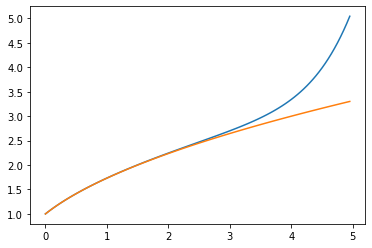

In [10]:
def func_4(x, y):
    return y - 2 * x / y


x, y = runge_kutta(a=0, b=5, func=func_4, y_init=1, n=100, c_2=0.5)

actual_y = [np.sqrt(2 * i + 1) for i in x]

print('Функция потерь для c_2=0.5:', loss(actual_y, y))

plt.plot(x, y)
plt.plot(x, actual_y)
plt.show()

### Метод Рунге-Кутта третьего порядка



In [11]:
def runge_kutta_3(a, b, func, n, y_init, a_2, a_3):
    h = abs(b - a) / n
    
    x = [0] * n
    y = [0] * n
    x[0] = a
    y[0] = y_init
    
    c_2 = (1/2 * a_3 - 1/3) / (a_2 * (a_3 - a_2))
    c_3 = (1/2 - c_2 * a_2) / a_3
    c_1 = 1 - c_2 - c_3
    b_21 = a_2
    b_32 = 1 / (6 * a_2 * c_3)
    b_31 = a_3 - b_32
    
    for i in range(1, n):
        k_1 = func(x[i-1], y[i-1]) * h
        k_2 = func(x[i-1] + a_2 * h, y[i-1] + b_21 * k_1) * h
        k_3 = func(x[i-1] + a_3 * h, y[i-1] + b_31 * k_1 + b_32 * k_2) * h
        x[i] = x[i-1] + h
        y[i] = y[i-1] + c_1 * k_1 + c_2 * k_2 + c_3 * k_3
    
    return x, y

#### Задача 5.
Сравнить ошибку метода Рунге-Кутта третьего порядка для разных коэффициентов альфа для четырёх дифференциальных уравнений из примеров ниже.

Коэффициенты для сравнения:

1. $$ \alpha_2=\frac{1}{2}, \; \alpha_3=1 $$ 
2. $$ \alpha_2=1, \; \alpha_3=\frac{1}{2} $$ 
3. $$ \alpha_2=\frac{2}{3}, \; \alpha_3=\frac{1}{3} $$ 
— на этих значениях происходит деление на ноль при вычислении
$$ \beta_{32}=\frac{1}{6 \cdot C_3 \cdot \alpha_2} $$ 
4. $$ \alpha_2=\frac{1}{3}, \; \alpha_3=\frac{2}{3} $$ 

##### Пример 1. $$ y'=y \cdot tg(x)+sin(x),\; y(0)=0, \; x \in [0;1,5] $$ 
*Аналитически:*
$$ y=\frac{1-cos(2x)}{4 \cdot cos(x)} $$ 

Потеря для первых альфа: 2.6149989971986792e-06


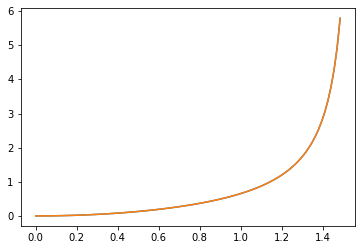

Потеря для вторых альфа: 9.495171612325034e-07


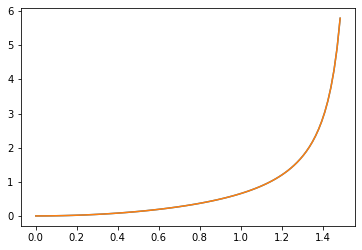

Потеря для четвёртых альфа: 0.00023994091633876253


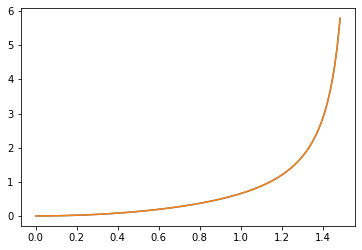

In [25]:
def func_5(x, y):
    return y * np.tan(x) + np.sin(x)


def actual_5(x):
    return (1 - np.cos(2 * x)) / (4 * np.cos(x))


n = 100

x, y = runge_kutta_3(0, 1.5, func_5, n, y_init=0, a_2=1/2, a_3=1)
actual_y = [actual_5(i) for i in x]
print('Потеря для первых альфа:', loss(actual_y, y))

plt.plot(x, y)
plt.plot(x, actual_y)
plt.show()

x, y = runge_kutta_3(0, 1.5, func_5, n, y_init=0, a_2=1, a_3=1/2)
print('Потеря для вторых альфа:', loss(actual_y, y))

plt.plot(x, y)
plt.plot(x, actual_y)
plt.show()

x, y = runge_kutta_3(0, 1.5, func_5, n, y_init=0, a_2=1/3, a_3=2/3)
print('Потеря для четвёртых альфа:', loss(actual_y, y))

plt.plot(x, y)
plt.plot(x, actual_y)
plt.show()

##### Пример 2. $$ y'=\frac{3y-2xy^2}{x}, \; y(1)=1, \; x \in [1;6] $$ 
*Аналитически:*
$$ y=\frac{1}{\frac{x}{2}+\frac{x^3}{2}} $$ 

Потеря для первых альфа: 0.14380877422116609


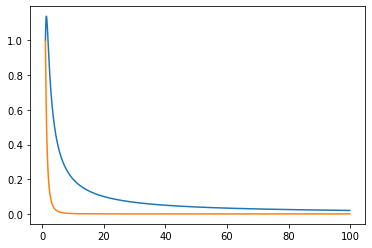

Потеря для вторых альфа: 0.14379713677087133


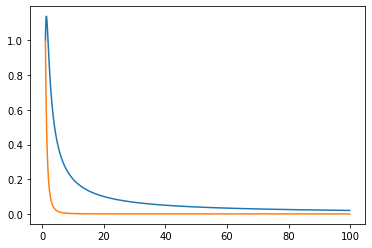

Потеря для четвёртых альфа: 0.14380641568640554


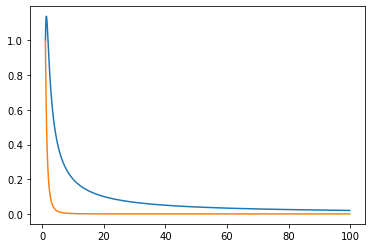

In [35]:
def func_6(x, y):
    return (3 * y - 2 * x * y ** 2) / x


def actual_6(x):
    return 1 / (x / 2 + (x ** 3) / 2)


n = 1000

x, y = runge_kutta_3(1, 100, func_6, n, 1, a_2=1/2, a_3=1)

actual_y = [actual_6(i) for i in x]
print('Потеря для первых альфа:', loss(actual_y, y))

plt.plot(x, y)
plt.plot(x, actual_y)
plt.show()

x, y = runge_kutta_3(1, 100, func_6, n, 1, a_2=1, a_3=1/2)
print('Потеря для вторых альфа:', loss(actual_y, y))

plt.plot(x, y)
plt.plot(x, actual_y)
plt.show()

x, y = runge_kutta_3(1, 100, func_6, n, 1, a_2=1/3, a_3=2/3)
print('Потеря для четвёртых альфа:', loss(actual_y, y))

plt.plot(x, y)
plt.plot(x, actual_y)
plt.show()


##### Пример 3. $$ y'=y-\frac{2x}{y}, \; y(0)=1, \; x \in [0;5] $$ 
*Аналитически:*
$$ y=\sqrt{2x+1} $$ 


In [13]:
n = 100

x, y = runge_kutta_3(0, 5, func_4, n, 1, a_2=1/2, a_3=1)
actual_y = [np.sqrt(2 * i + 1) for i in x]
print('Потеря для первых альфа:', loss(actual_y, y))

x, y = runge_kutta_3(0, 5, func_4, n, 1, a_2=1, a_3=1/2)
print('Потеря для вторых альфа:', loss(actual_y, y))

x, y = runge_kutta_3(0, 5, func_4, n, 1, a_2=1/3, a_3=2/3)
print('Потеря для четвёртых альфа:', loss(actual_y, y))

Потеря для первых альфа: 0.0019752113631683874
Потеря для вторых альфа: 0.01571198926513581
Потеря для четвёртых альфа: 0.003231581724429098


##### Пример 4. $$ y'=\frac{x^2 y^2-2y}{2x}, \; y(1)=1, \; x \in [1;1,5] $$ 
*Аналитически:*
$$ y=\frac{1}{\frac{3}{2}x-\frac{1}{2}x^2} $$ 

### Метод Рунге-Кутта четвёртого порядка
$$ y'=f(x,y) $$ 
$$ y(x_0)=y_0 $$ 
$$ y_i=y_0+C_1 k_1 +C_2 k_2 + C_3 k_3 + C_4 k_4 $$ 
$$ k_1=f(x_i,y_i) \cdot h $$ 

In [14]:
def runge_kutta_4(a, b, func, n, y_init):
    h = abs(b - a) / n

    x = [0] * n
    y = [0] * n
    x[0] = a
    y[0] = y_init

    for i in range(1, n):
        k_1 = func(x[i-1], y[i-1])
        k_2 = func(x[i-1] + h/2, y[i-1] + h/2 * k_1)
        k_3 = func(x[i-1] + h/2, y[i-1] + h/2 * k_2)
        k_4 = func(x[i-1] + h, y[i-1] + h * k_3)
        x[i] = x[i - 1] + h
        y[i] = y[i - 1] + h/6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

    return x, y

Потеря: 6.331215454009295


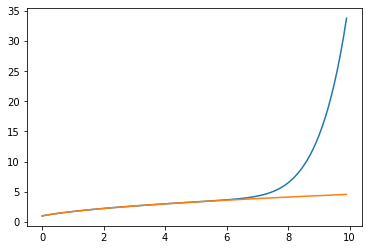

In [15]:
x, y = runge_kutta_4(0, 10, func_4, 100, 1)
actual_y = [np.sqrt(2 * i + 1) for i in x]

print('Потеря:', loss(actual_y, y))

plt.plot(x, y)
plt.plot(x, actual_y)
plt.show()